# Muhammad Dzaka Murran | 2141720076 | TI-3H

# Segmentasi Gambar dengan Clustering

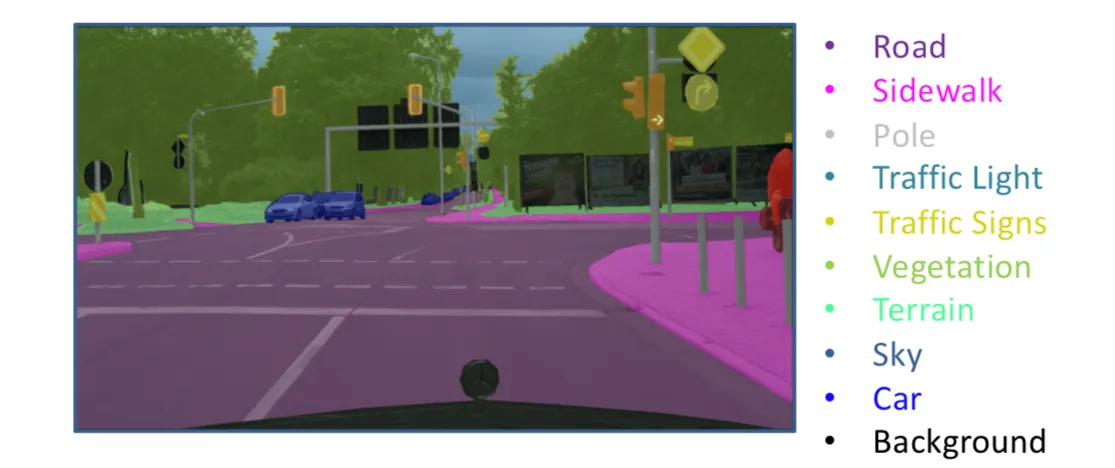

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

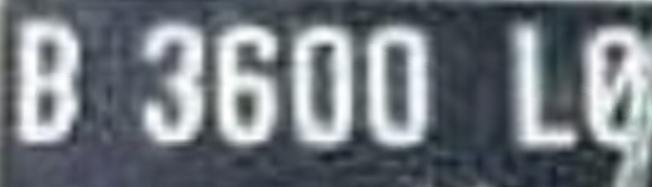

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Pengerjaan

## Import Library

In [1]:
import numpy as np
import os
import cv2 as cv
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

## Read plate image

In [2]:
# read image
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


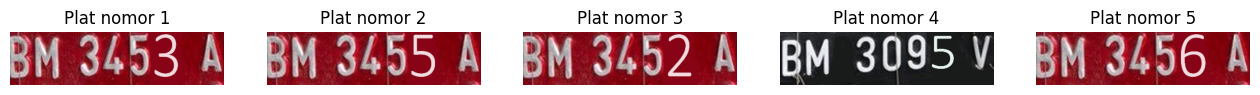

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/machine-learning/platnomor'

image_files = os.listdir(image_directory)

image_list = []

for image_file in image_files:
    image_path = os.path.join(image_directory, image_file)
    img = cv2.imread(image_path)
    image_list.append(img)

# Define the target image size
target_size = (400, 100)

# Create a figure with subplots
fig, axs = plt.subplots(1, len(image_list), figsize=(16, 6))

for i, image in enumerate(image_list):
    # Resize the image to the target size
    img = cv2.resize(image, target_size)

    # Display the image in a subplot
    axs[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axs[i].set_title(f'Plat nomor {i + 1}')
    axs[i].axis('off')

plt.show()


### Gaussian Filter and Contrast Enhancement For a better result

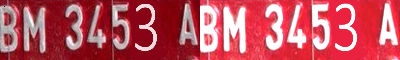

Plat nomor 1 - Original vs Enhanced


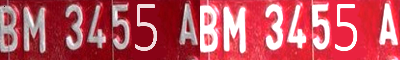

Plat nomor 2 - Original vs Enhanced


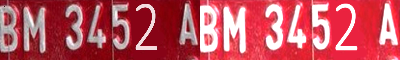

Plat nomor 3 - Original vs Enhanced


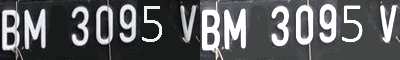

Plat nomor 4 - Original vs Enhanced


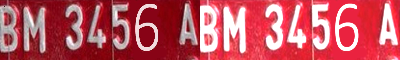

Plat nomor 5 - Original vs Enhanced


In [42]:
from google.colab.patches import cv2_imshow
import cv2

# Menerapkan filter Gaussian dan peningkatan kontras pada gambar dalam image_list
filtered_images = []
for image in image_list:
    # Filter gambar dengan Gaussian Blur
    ksize = (5, 5)  # Ukuran kernel filter
    sigma = 0  # Nilai sigma
    blurred_image = cv2.GaussianBlur(image, ksize, sigma)

    # Peningkatan kontras
    alpha = 1.5  # Faktor kontras
    beta = 30  # Faktor kecerahan
    contrast_enhanced_image = cv2.convertScaleAbs(blurred_image, alpha=alpha, beta=beta)

    # Mengurangi noise dengan Median Filtering
    denoised_image = cv2.medianBlur(contrast_enhanced_image, 5)

    # Tambahkan gambar yang telah difilter ke daftar filtered_images
    filtered_images.append(denoised_image)

# Menampilkan gambar asli dan gambar yang telah difilter secara horizontal dengan label
for i, (original, enhanced) in enumerate(zip(image_list, filtered_images)):
    combined_image = cv2.hconcat([original, enhanced])

    # Mengatur lebar (width) dan tinggi (height) gambar yang ditampilkan
    width = 400  # Sesuaikan dengan lebar yang diinginkan
    height = 60  # Sesuaikan dengan tinggi yang diinginkan
    combined_image = cv2.resize(combined_image, (width, height))

    cv2_imshow(combined_image)
    print(f"Plat nomor {i + 1} - Original vs Enhanced")

### Normalize Image

In [20]:
normalized_images = [image.astype(np.float32) / 255.0 for image in image_list]

### KMeans Clustering without preprocessing

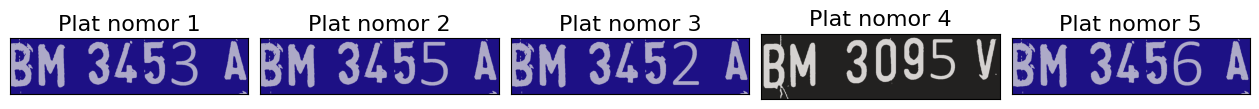

In [48]:
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=2, n_init = 'auto')

# Inisialisasi list untuk hasil gambar yang sudah di-segmentasi beserta label
segmented_images = []

for i, normalized_image in enumerate(normalized_images):
    # Ubah gambar ke bentuk yang dapat digunakan oleh K-Means
    data = normalized_image.reshape(-1, 3)

    # Fit K-Means pada data
    kmeans.fit(data)

    # Prediksi label kelompok untuk data
    cluster_labels = kmeans.predict(data)

    # Dapatkan pusat-pusat kelompok
    new_colors = kmeans.cluster_centers_

    # Ganti warna gambar dengan pusat kelompok yang sesuai
    recolored_image = new_colors[cluster_labels].reshape(normalized_image.shape)

    # Tambahkan gambar yang sudah di-segmentasi beserta label
    label = f"Plat nomor {i + 1}"
    segmented_images.append((recolored_image, label))

# Tampilkan hasilnya dengan jarak yang lebih kecil
fig, ax = plt.subplots(1, len(segmented_images), figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

for i, (segmented_image, label) in enumerate(segmented_images):
    ax[i].imshow(segmented_image)
    ax[i].set_title(label, size=16)

plt.show()

### KMeans Clustering with preprocessing

In [43]:
normalized_filtered = [image.astype(np.float32) / 255.0 for image in filtered_images]

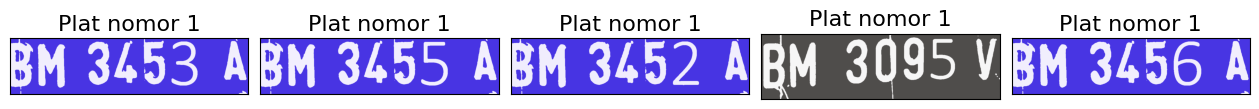

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi MiniBatchKMeans
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(n_clusters=2, n_init='auto')

# Inisialisasi list untuk hasil gambar yang sudah di-segmentasi
segmented_images = []

for image in normalized_filtered:
    # Ubah gambar ke bentuk yang dapat digunakan oleh K-Means
    data = image.reshape(-1, 3)

    # Fit K-Means pada data
    kmeans.fit(data)

    # Prediksi label kelompok untuk data
    cluster_labels = kmeans.predict(data)

    # Dapatkan pusat-pusat kelompok
    new_colors = kmeans.cluster_centers_

    # Ganti warna gambar dengan pusat kelompok yang sesuai
    recolored_image = new_colors[cluster_labels].reshape(image.shape)

    # Tambahkan gambar yang sudah di-segmentasi beserta label
    label = f"Plat nomor {i + 1}"
    segmented_images.append((recolored_image, label))

# Tampilkan hasilnya dengan jarak yang lebih kecil
fig, ax = plt.subplots(1, len(segmented_images), figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

for i, (segmented_image, label) in enumerate(segmented_images):
    ax[i].imshow(segmented_image)
    ax[i].set_title(label, size=16)

plt.show()


### Thresholding with preprocessing

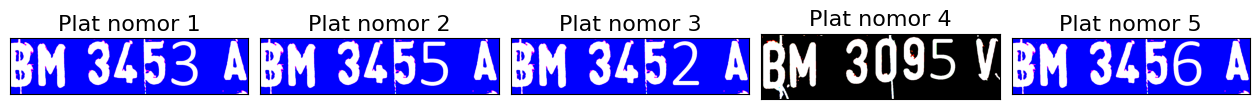

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Inisialisasi list untuk hasil gambar yang sudah di-segmentasi
segmented_images = []

for image in normalized_filtered:
    # Melakukan thresholding pada gambar.
    # Nilai threshold digunakan untuk memisahkan area dengan nilai tinggi atau rendah.
    threshold = 0.5  # Sesuaikan ambang sesuai kebutuhan
    binary_image = (image > threshold).astype(np.uint8) * 255

    # Menambahkan gambar yang sudah di-segmentasi ke dalam list
    segmented_images.append(binary_image)

# Menampilkan hasilnya dengan jarak yang lebih kecil
fig, ax = plt.subplots(1, len(segmented_images), figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

# Menampilkan gambar-gambar yang sudah di-segmentasi dalam format hitam-putih
for i, segmented_image in enumerate(segmented_images):
    ax[i].imshow(segmented_image, cmap='gray')  # Menggunakan cmap 'gray' untuk tampilan hitam putih
    ax[i].set_title(f"Plat nomor {i + 1}", size=16)

plt.show()
